Objective:
1) Implementation of kmeans Clustering in Data Stocks 
2) Visualization of  Kmeans with different columns

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Library Decleration

In [0]:
# Importing the Keras libraries and packages
import os
import numpy as np
import pandas as pd
import string
from os import listdir
from pickle import dump
from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model, load_model

#Read and Open File

In [0]:
fn = "/content/drive/My Drive/Dataset/Flickr8k_text/Flickr8k.token.txt"
file = open(fn, 'r')
data = file.read()

#Seperationg image and captions

In [0]:
desc = dict()
for line in data.split('\n'):
  captions = line.split()
  if len(line) == 0:
    continue
  image_name = captions[0]
  image_desc = captions[1:]
  image_name = image_name.split('.')[0]
  image_desc = ' '.join(image_desc)
  if image_name not in desc:
    desc[image_name] = list()
  desc[image_name].append(image_desc)
desc

# Data Cleaning

In [0]:
#  trnsltn table to remove punctuation
trans = str.maketrans('', '', string.punctuation)
for key, value in desc.items():
    for i in range(len(value)):
        des = value[i]
        # spliting the string
        des = des.split()
        # converting to lc
        des = [i.lower() for i in des]
        # to remove punctuation
        des = [i.translate(trans) for i in des]
        # remove hanging 's' and 'a'
        des = [i for i in des if len(i)>=2]
        # remove tokens with numbers in them
        des = [i for i in des if i.isalpha()]
        # store as string
        value[i] =  ' '.join(des)
desc

# Set of unique words

In [6]:
# We can add multiple elements using the update() method.
# The update() method can take tuples, lists, strings or other sets as its argument
unique = set()
for value in desc.values():
    [unique.update(i.split()) for i in value]
print(unique)
print(len(unique))

{'glider', 'kicker', 'warmly', 'foul', 'spokesmodels', 'cannot', 'tricolored', 'yorkshire', 'propelling', 'sneakers', 'mothers', 'bag', 'greens', 'trace', 'contained', 'ox', 'focuses', 'mustached', 'lap', 'dimpled', 'soccor', 'light', 'exercised', 'toddles', 'comfort', 'blur', 'foreheads', 'bikinis', 'this', 'carriage', 'illustrated', 'scruffy', 'openmouthed', 'vending', 'igloo', 'umbrellas', 'cigars', 'turn', 'porch', 'call', 'operates', 'onehanded', 'midstride', 'lifted', 'washington', 'font', 'attack', 'teens', 'rockets', 'viewpoint', 'milkshake', 'sashes', 'throwing', 'throw', 'armenian', 'gains', 'participating', 'lane', 'hoop', 'aveda', 'clinging', 'soars', 'champ', 'puppies', 'computer', 'medium', 'arrow', 'bellbottoms', 'dozes', 'gondola', 'ferris', 'saxophone', 'kissed', 'piles', 'tiles', 'passengers', 'nations', 'maneuvering', 'zebra', 'snowshovel', 'galloping', 'buoy', 'pouring', 'supporters', 'incline', 'poof', 'streches', 'flipped', 'cart', 'harvested', 'homes', 'buried', 

# Feature Extractioon using Xception

In [0]:
#we have many pre-trained model that have been already trained on large datasets and 
#extract the features from these models and use them for our tasks, namely VGG16,VGG19,ResNet50,Inception V3,Xception
#thses are trained for cnn on imagenet dataset.ImageNet is an image database organized according to the WordNet hierarchy in which
# each node of the hierarchy is depicted by hundreds and thousands of images. Currently we have an average of over five hundred images per node.
# With include_top=False, the model can be used for feature extraction, for example to build an autoencoder or to stack any other model on 
#top of it. Note that input_shape and pooling parameters should only be specified when include_top is False.

In [10]:
#loading model
img_direc = "/content/drive/My Drive/Dataset/Flickr8k_Dataset/Flicker8k_Dataset"
model = Xception(include_top=False)
#model.summary()
features = dict()
for img in listdir(img_direc):
		# load an image from file
		imgname = img_direc + '/' + img
		image = load_img(imgname,target_size=(299,299))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = img.split('.')[0]
		# store feature
		print('>%s' % img)
		features[image_id] = feature
dump(features, open('features.pkl', 'wb'))
print(len(features))

Streaming output truncated to the last 5000 lines.
>3141440149_00becbbb93.jpg
>3141293960_74459f0a24.jpg
>3139876823_859c7d7c23.jpg
>3141613533_595723208d.jpg
>3143574389_8a4048fbe2.jpg
>3143159297_6f2f663ea6.jpg
>3143155555_32b6d24f34.jpg
>3142055158_01b9e4caa4.jpg
>3143765063_a7761b16d3.jpg
>3143982558_9e2d44c155.jpg
>3143953179_1c08c023a5.jpg
>3143978284_ac086be9a3.jpg
>3143980056_7a64a94b58.jpg
>3145967309_b33abe4d84.jpg
>3144705706_391d7b77c7.jpg
>3143991972_7193381aeb.jpg
>3145869775_85dfae43bd.jpg
>3145967019_1a83ebf712.jpg
>314603661_51e05e0e24.jpg
>314685044_da4390728e.jpg
>3146232740_df3da0163b.jpg
>3146355833_1b7fc80210.jpg
>3146937399_8c046b7b1a.jpg
>3146630574_05d9ebbed1.jpg
>3147913471_322ea231d9.jpg
>3148193539_de9dd48fc8.jpg
>3147217787_ed21cd4990.jpg
>3147758035_e8a70818cb.jpg
>3148286846_40ae914172.jpg
>3149038044_c7c94688c6.jpg
>3148571800_c5515e6c3d.jpg
>3148811252_2fa9490a04.jpg
>314904143_5a216a192b.jpg
>3148647065_2d6cd88cf6.jpg
>3149804151_1cc8d10783.jpg
>315021

# Hierarchical Agglomorative Implementation

In [0]:

agglo_model = AgglomerativeClustering(n_clusters=3,linkage='ward')
agglo_model.fit(data)
y_predict = agglo_model.fit_predict(data)

# Applying Cluster on PCA values

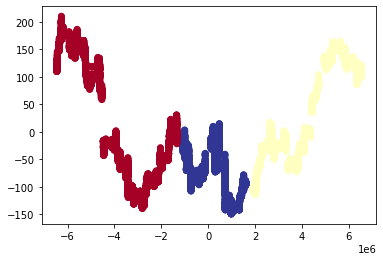

In [0]:
py.scatter(x_red[:,0],x_red[:,1],c=y_predict,cmap='RdYlBu')

# NASAQ.AAL vs NASAQ.AAPL(Cluster View)

Text(0, 0.5, 'NASDAQ.AAPL')

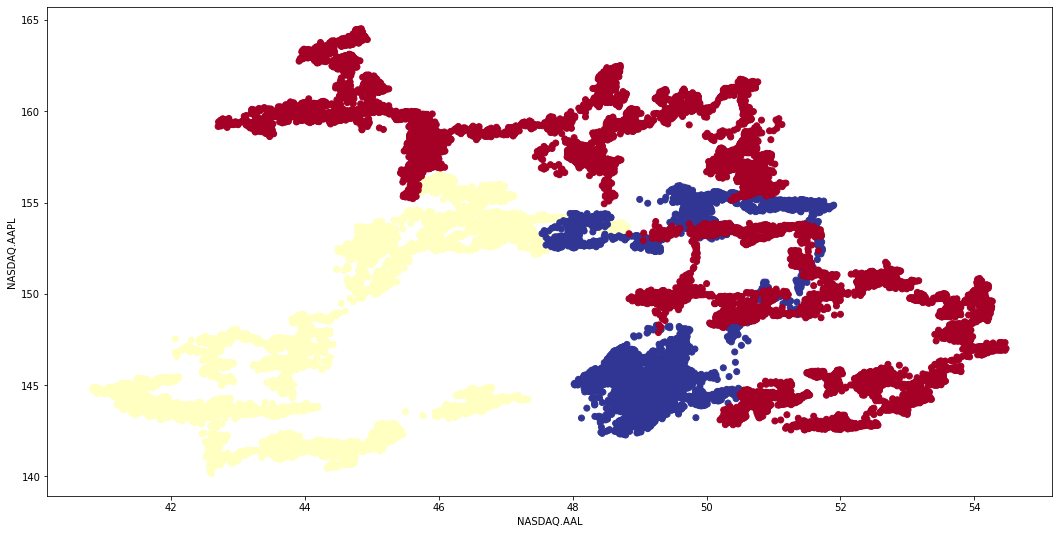

In [0]:
py.figure(figsize=(18,9))
py.scatter(data['NASDAQ.AAL'],data['NASDAQ.AAPL'],c=y_predict,cmap='RdYlBu')
py.xlabel('NASDAQ.AAL')
py.ylabel('NASDAQ.AAPL') 

# NASAQ.AAL vs NASAQ.ADP(Cluster View)

Text(0, 0.5, 'NASDAQ.ADP')

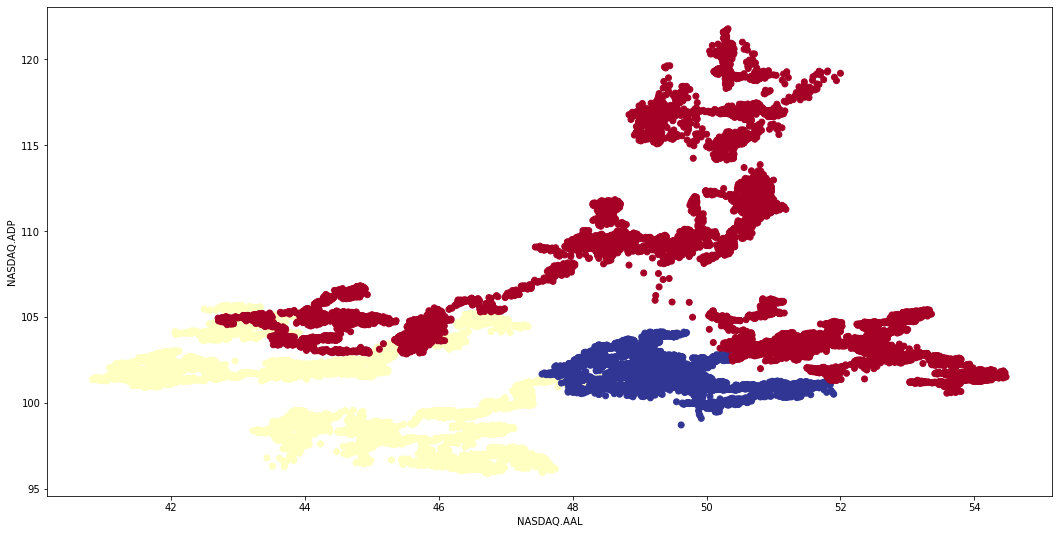

In [0]:
py.figure(figsize=(18,9))
py.scatter(data['NASDAQ.AAL'],data['NASDAQ.ADP'],c=y_predict,cmap='RdYlBu')
py.xlabel('NASDAQ.AAL')
py.ylabel('NASDAQ.ADP') 